<a href="https://colab.research.google.com/github/Amymah-Miftah/Data-Science/blob/main/Retail_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file_path = '/content/online_retail_II.xlsx'
df_excel = pd.read_excel(excel_file_path)
csv_file_path = '/content/online_retail_II.csv'
df_excel.to_csv(csv_file_path, index=False)

In [66]:
df = pd.read_csv('/content/online_retail_II.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [68]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


## Data Cleaning & Preprocessing

In [69]:
# checking missing values
(df.isnull().sum() / len(df))*100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.557225
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,20.539488
Country,0.000000


In [70]:

missing_mask = df["Customer ID"].isna()
imputed_percentage = (missing_mask.sum() / len(df)) * 100
imputed_percentage

np.float64(20.53948818275762)

In [71]:
#the total number of duplicate rows
df.duplicated().sum()

np.int64(6865)

In [72]:
duplicate_counts = (
    df
    .groupby(list(df.columns))
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

duplicate_counts

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,count
339,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom,2
346,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
348,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,3
349,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
352,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
408434,C525550,22158,3 HEARTS HANGING DECORATION RUSTIC,-8,2010-10-05 19:31:00,2.95,15270.0,United Kingdom,3
409086,C528451,22179,SET 10 LIGHTS NIGHT OWL,-1,2010-10-22 11:23:00,6.75,12986.0,United Kingdom,2
409274,C529606,22728,ALARM CLOCK BAKELIKE PINK,-12,2010-10-29 10:28:00,3.75,17396.0,United Kingdom,2
410117,C534698,22119,PEACE WOODEN BLOCK LETTERS,-1,2010-11-23 15:59:00,6.95,16242.0,United Kingdom,2


In [73]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

Removing Duplicated rows


In [74]:
# Deleting duplicated rows
df = df.drop_duplicates()
duplicate_counts = (
    df
    .groupby(list(df.columns))
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

duplicate_counts

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,count


Imputing Missing Data

Imputing Customer ID

In [75]:
# convert InvoiceDate to datetime objects to connect the Invoice with the exact day ant time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  515668 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.6+ MB


In [77]:
# To identify which rows with missing Customer ID belong to the same customer,
# we group records with missing Customer ID by Invoice and InvoiceDate,
# A unique placeholder Customer ID is then generated for each group
#  the imputed values start from the latest existing ID.

# Knowing the max Id value
print(f"the max ID = {int(df['Customer ID'].max())}")

if df["Customer ID"].notna().any():
    next_anonymous_id = int(df["Customer ID"].max()) + 1
else:
    next_anonymous_id = 100_000

# combining the max id with grouping missing customers:

mask = df["Customer ID"].isna()

df.loc[mask, "Customer ID"] = (
    df.loc[mask]
    .groupby(["Invoice", "InvoiceDate"])
    .ngroup()
    + next_anonymous_id
)

the max ID = 18287


In [78]:
# Convert Customer ID to integer type now that all are numeric (float was from NaN)
df["Customer ID"] = df["Customer ID"].astype(int)

In [79]:
# Checking No missing IDs
df["Customer ID"].isna().sum()

np.int64(0)

In [80]:
# Checking the percentage of the imputed IDs
# Before the imputing the percentage of missing ID relatively 20.539480
missing_mask = df[df['Customer ID']>= next_anonymous_id]
df_percentage = (missing_mask.shape[0] / df.shape[0]) * 100
df_percentage

20.79325717899868

In [81]:

# imputing the missing values of Description column with a constant "UnKnown"
df['Description'] = df['Description'].fillna('UnKnown')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  518596 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  518596 non-null  int64         
 7   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 35.6+ MB


EDA


## Feature Engineering

In [83]:
#I dentify invalid values
# Negative quantity
neg_qty = df[df['Quantity'] < 0]
print("Number of negative quantities:", len(neg_qty))

# Zero or negative price
invalid_price = df[df['Price'] <= 0]
print("Number of zero/negative prices:", len(invalid_price))

# Flag key features

df['IsReturn'] = (df['Quantity'] < 0).astype(int)
df['IsInvalidPrice'] = (df['Price'] <= 0).astype(int)
df['IsCancelled'] = df['Invoice'].apply(lambda x: 1 if str(x).startswith('C') else 0)

# Revenue columns
df['Revenue'] = df['Quantity'] * df['Price']
df['Revenue_abs'] = df['Quantity'].abs() * df['Price']




Number of negative quantities: 12302
Number of zero/negative prices: 3684


## EDA

In [84]:

# Summarize Returns & Invalid Prices

summary = {
    'Total number of returns': df['IsReturn'].sum(),
    'Total revenue lost due to returns': df.loc[df['IsReturn']==1, 'Revenue'].sum(),
    'Count of invalid prices': df['IsInvalidPrice'].sum(),
    'Percentage of invalid prices': df['IsInvalidPrice'].mean()*100,
    '% of total transactions that are return': df['IsReturn'].mean()*100,
    'Total number of transactions': len(df)
}

print("Summarize Returns & Invalid Prices")
for k,v in summary.items():
    print(f"{k}: {v}")



Summarize Returns & Invalid Prices
Total number of returns: 12302
Total revenue lost due to returns: -629808.6499999999
Count of invalid prices: 3684
Percentage of invalid prices: 0.7103795632824009
% of total transactions that are return: 2.3721741008415025
Total number of transactions: 518596


In [85]:

# Cancellations & relation with returns/prices

cancelled = df[df['IsCancelled']==1]

cancel_qty = cancelled[cancelled['IsReturn']==1]
cancel_price = cancelled[cancelled['IsInvalidPrice']==1]

pct_qty = len(cancel_qty) / len(cancelled) * 100
pct_price = len(cancel_price) / len(cancelled) * 100

print("\n=== Cancellations & relation with returns/prices ===")
print(f"Canceled invoices with negative quantity: {len(cancel_qty)} ({pct_qty:.2f}%)")
print(f"Canceled invoices with invalid price: {len(cancel_price)} ({pct_price:.2f}%)")




=== Cancellations & relation with returns/prices ===
Canceled invoices with negative quantity: 10181 (99.99%)
Canceled invoices with invalid price: 0 (0.00%)


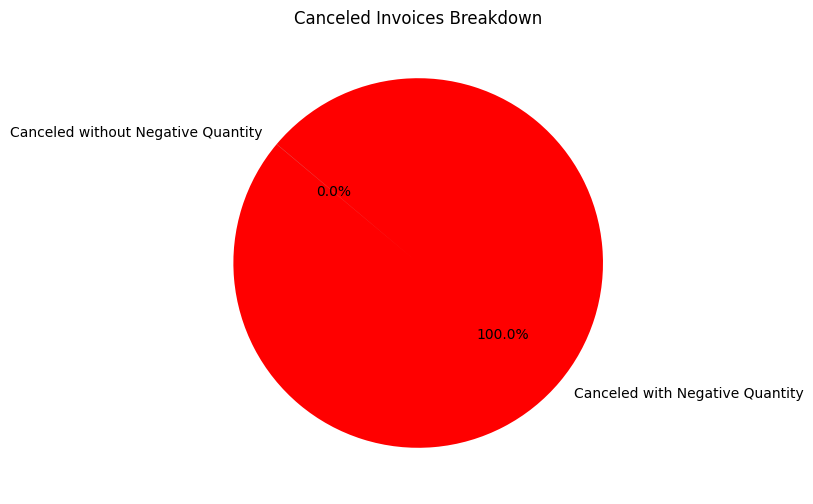

In [86]:
# Pie chart for canceled invoices breakdown
labels = ['Canceled with Negative Quantity', 'Canceled without Negative Quantity']
sizes = [len(cancel_qty), len(cancelled) - len(cancel_qty)]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red','grey'])
plt.title('Canceled Invoices Breakdown')
plt.show()

In [87]:
# Revenue Loss by Product, Customer, Country

returns = df[df['IsReturn']==1]

# Top products causing loss
loss_by_product = returns.groupby('StockCode')['Revenue'].sum().sort_values()
print("\nTop 10 Products causing revenue loss:")
print(loss_by_product.head(10))

# Top customers causing loss
loss_by_customer = returns.groupby('Customer ID')['Revenue'].sum().sort_values()
print("\nTop 10 Customers causing revenue loss:")
print(loss_by_customer.head(10))

# Loss by country
loss_by_country = returns.groupby('Country')['Revenue'].sum().sort_values()
print("\nRevenue loss by Country:")
print(loss_by_country)




Top 10 Products causing revenue loss:
StockCode
M              -277088.77
AMAZONFEE       -59491.12
BANK CHARGES    -28756.23
D                -8186.21
22423            -7027.05
79323W           -6367.10
79323P           -3967.35
84078A           -3939.40
22138            -3761.65
71477            -3730.25
Name: Revenue, dtype: float64

Top 10 Customers causing revenue loss:
Customer ID
14063   -26477.40
17399   -25111.09
12918   -21907.00
15760   -19712.21
23448   -18910.69
14911   -14410.46
17949   -13972.85
23521   -13541.33
23518   -13541.33
23519   -13474.79
Name: Revenue, dtype: float64

Revenue loss by Country:
Country
United Kingdom         -514440.62
EIRE                    -28673.89
Norway                  -19864.61
France                  -16441.59
Spain                   -10516.52
Germany                  -6104.97
Netherlands              -4922.59
Hong Kong                -4280.26
Denmark                  -3933.90
Channel Islands          -3179.00
Malta                    

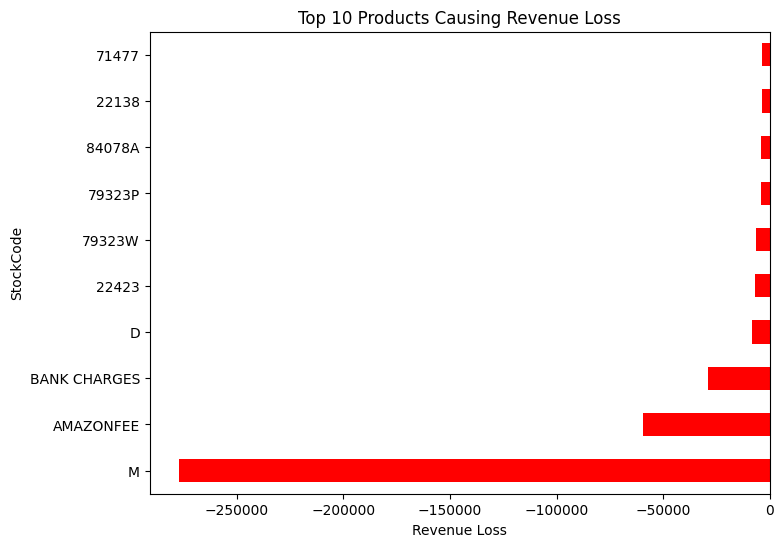

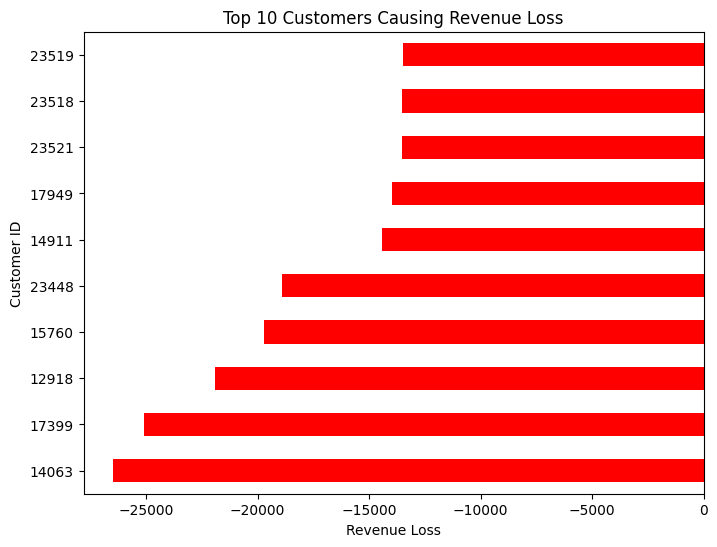

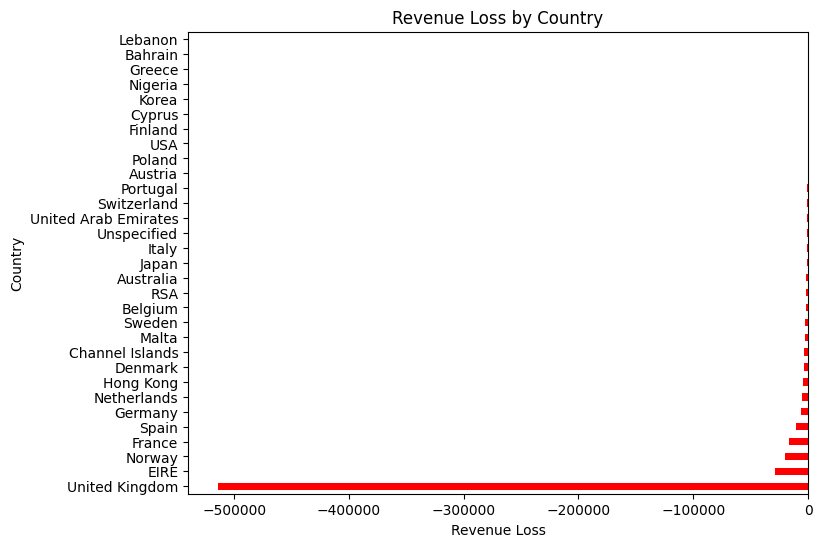

In [88]:
# Top 10 products causing revenue loss
plt.figure(figsize=(8,6))
loss_by_product.head(10).plot(kind='barh', color='red')
plt.xlabel('Revenue Loss')
plt.title('Top 10 Products Causing Revenue Loss')
plt.show()

# Top 10 customers causing revenue loss
plt.figure(figsize=(8,6))
loss_by_customer.head(10).plot(kind='barh', color='red')
plt.xlabel('Revenue Loss')
plt.title('Top 10 Customers Causing Revenue Loss')
plt.show()

# Revenue loss by country
plt.figure(figsize=(8,6))
loss_by_country.plot(kind='barh', color='red')
plt.xlabel('Revenue Loss')
plt.title('Revenue Loss by Country')
plt.show()




/tmp/ipython-input-613192959.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').sum().plot(title='Monthly Revenue (including returns)')


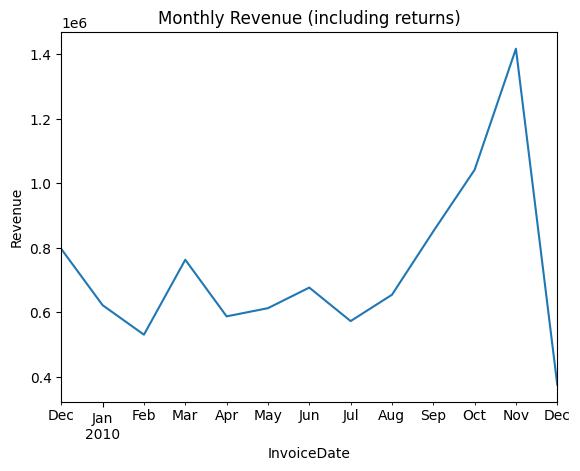

/tmp/ipython-input-613192959.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].where(df['IsReturn']==1).resample('M').sum().plot(title='Monthly Returns')


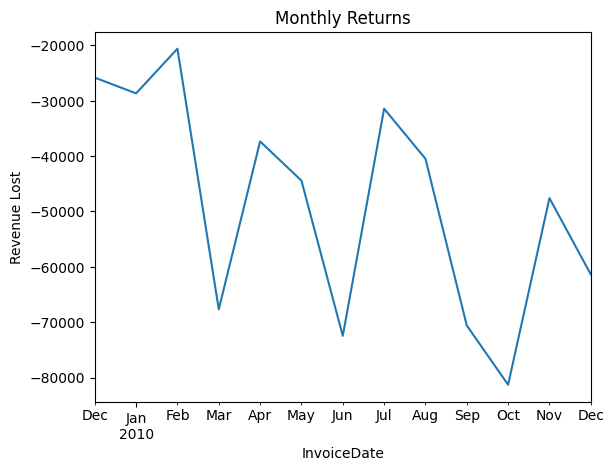

In [89]:
# detecting seasonality, peak sales, and return trends.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

# Monthly revenue
df['Revenue'].resample('M').sum().plot(title='Monthly Revenue (including returns)')
plt.ylabel('Revenue')
plt.show()

# Monthly returns
df['Revenue'].where(df['IsReturn']==1).resample('M').sum().plot(title='Monthly Returns')
plt.ylabel('Revenue Lost')
plt.show()


<Axes: >

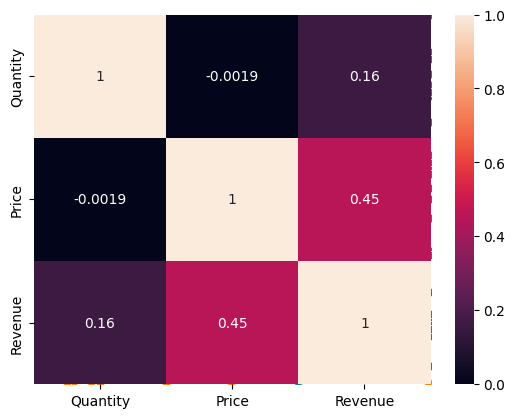

In [90]:
# relationships between features
sns.scatterplot(x='Quantity', y='Revenue', data=df)
sns.scatterplot(x='Price', y='Revenue', data=df)
sns.heatmap(df[['Quantity','Price','Revenue']].corr(), annot=True)


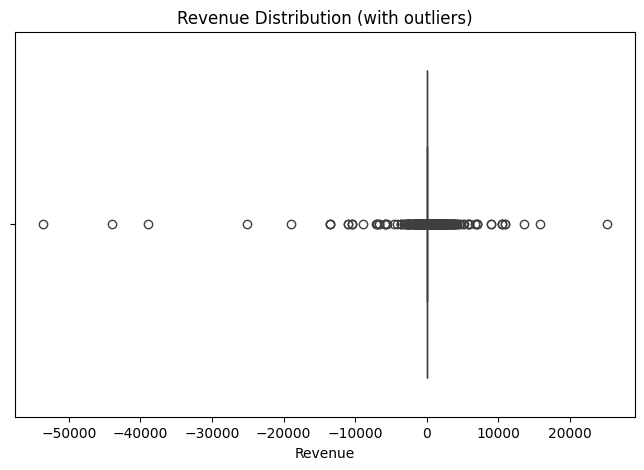

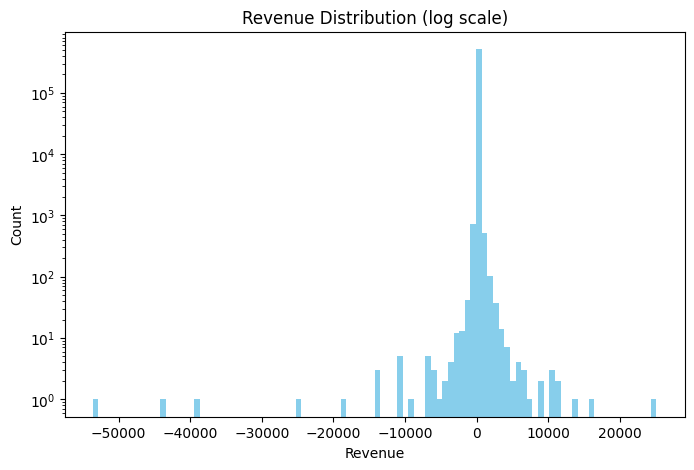


Column: Quantity
Median: 3.0
IQR: 9.0
1st percentile: -4.0
99th percentile: 120.0

Column: Price
Median: 2.1
IQR: 2.96
1st percentile: 0.21
99th percentile: 20.0

Column: Revenue
Median: 10.08
IQR: 13.950000000000003
1st percentile: -9.480500000000003
99th percentile: 183.6


In [91]:
# Boxplot for Revenue
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Revenue'])
plt.title('Revenue Distribution (with outliers)')
plt.show()

# Histogram with log scale for Revenue
plt.figure(figsize=(8,5))
plt.hist(df['Revenue'], bins=100, log=True, color='skyblue')
plt.title('Revenue Distribution (log scale)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


# Skewed Distributions (Median, IQR, Percentiles)

numeric_cols = ['Quantity', 'Price', 'Revenue']
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print("Median:", df[col].median())
    print("IQR:", df[col].quantile(0.75)-df[col].quantile(0.25))
    print("1st percentile:", df[col].quantile(0.01))
    print("99th percentile:", df[col].quantile(0.99))

Total Revenue: 9505775.56
Revenue lost due to returns: -629808.65 (-6.63%)


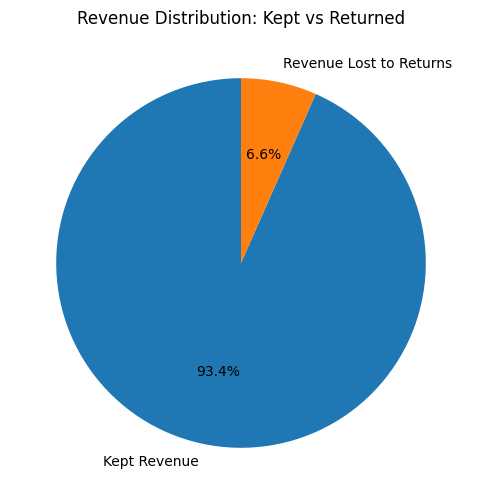

In [92]:


# Revenue and Returns Analysis
# Total revenue (including returns)
total_revenue = df['Revenue'].sum()

# Total returns revenue
total_returns = df[df['IsReturn']==1]['Revenue'].sum()

# Percentage of revenue lost to returns
pct_returns = total_returns / total_revenue * 100

print(f"Total Revenue: {total_revenue:.2f}")
print(f"Revenue lost due to returns: {total_returns:.2f} ({pct_returns:.2f}%)")

returned_revenue = abs(total_returns)
kept_revenue = total_revenue - returned_revenue

plt.figure(figsize=(6,6))
plt.pie(
    [kept_revenue, returned_revenue],
    labels=['Kept Revenue', 'Revenue Lost to Returns'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Revenue Distribution: Kept vs Returned')
plt.show()





In [93]:
# How many transactions have invalid prices? (NaN or zero)
invalid_prices = df[df['Price'].isna() | (df['Price'] <= 0)]
print(f"Transactions with invalid prices (NaN or <=0): {len(invalid_prices)}")

# How many transactions have negative quantities?
negative_quantities = df[df['Quantity'] < 0]
print(f"Transactions with negative quantities: {len(negative_quantities)}")

# Are invalid prices linked to cancellations/returns?
if 'IsReturn' in df.columns:
    invalid_price_returns = invalid_prices[invalid_prices['IsReturn'] == True]
    print(f"Invalid price transactions that were returned/cancelled: {len(invalid_price_returns)}")
else:
    print("No 'Returned' column found; cannot check link with cancellations.")

# Are negative quantities linked to returns?
if 'IsReturn' in df.columns:
    negative_quantity_returns = negative_quantities[negative_quantities['IsReturn'] == True]
    print(f"Negative quantity transactions that were returned: {len(negative_quantity_returns)}")
else:
    print("No 'Returned' column found; cannot check link with returns.")


Transactions with invalid prices (NaN or <=0): 3684
Transactions with negative quantities: 12302
Invalid price transactions that were returned/cancelled: 2121
Negative quantity transactions that were returned: 12302


Diecoverning the main factors led to increase and decries the revenue\

Most frequently purchased products:
 StockCode
21212     59346
85123A    57135
84077     54554
85099B    48305
17003     47647
84879     44364
84991     36172
21977     31687
21232     26496
21213     25353
Name: Quantity, dtype: int64


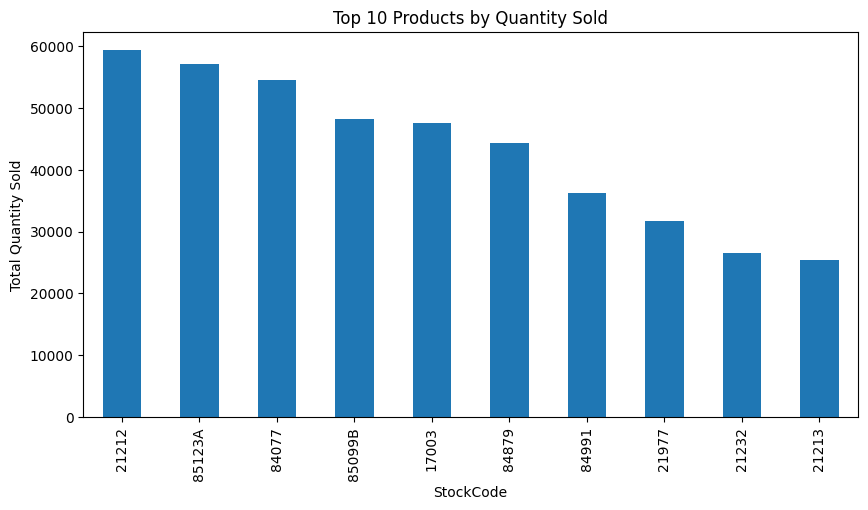

Products generating highest revenue:
 StockCode
22423     162885.71
85123A    155540.37
DOT       116401.99
85099B     88784.03
84879      72251.32
22086      57808.25
47566      49626.92
84347      47641.89
POST       46092.36
21843      42073.15
Name: Revenue, dtype: float64


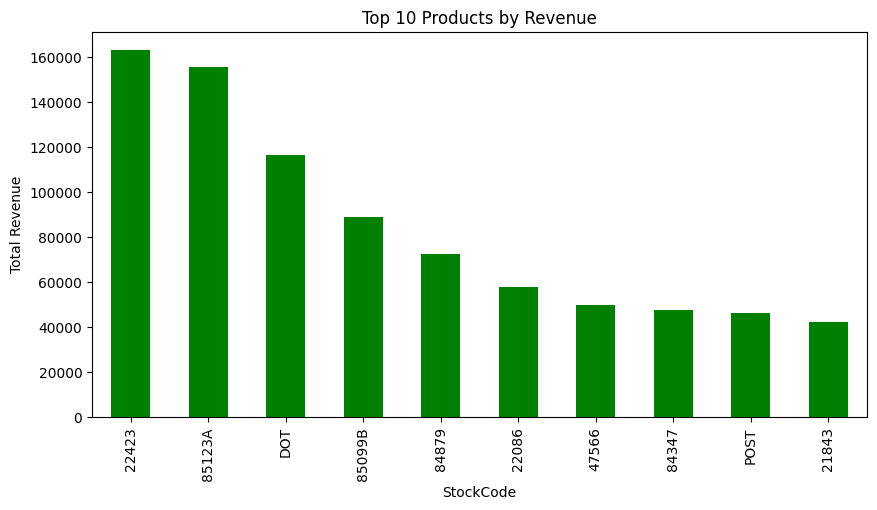

No 'Returned' column found in the dataset.
High-selling products that are also high-revenue:
            Total_Quantity  Total_Revenue  Quantity_Rank  Revenue_Rank  \
StockCode                                                               
84879               44364       72251.32            6.0           5.0   
85099B              48305       88784.03            4.0           4.0   
85123A              57135      155540.37            2.0           2.0   

           High_Sell_High_Rev  
StockCode                      
84879                    True  
85099B                   True  
85123A                   True  


In [94]:
# Which products are purchased most frequently
product_counts = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
print("Most frequently purchased products:\n", product_counts.head(10))

# Visualization
product_counts.head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Products by Quantity Sold")
plt.ylabel("Total Quantity Sold")
plt.show()

# Which products generate the highest revenue
product_revenue = df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False)
print("Products generating highest revenue:\n", product_revenue.head(10))

# Visualization
product_revenue.head(10).plot(kind='bar', figsize=(10,5), color='green', title="Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.show()

# Which products are most frequently returned?
# Assuming there's a 'Returned' column with True/False or 1/0
if 'IsReturned' in df.columns:
    returned_counts = df[df['IsReturned'] == True].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
    print("Most frequently returned products:\n", returned_counts.head(10))

    # Visualization
    returned_counts.head(10).plot(kind='bar', figsize=(10,5), color='red', title="Top 10 Returned Products")
    plt.ylabel("Quantity Returned")
    plt.show()
else:
    print("No 'Returned' column found in the dataset.")

# Are high-selling products also high-revenue products?
# Merge quantity and revenue rankings
summary = pd.DataFrame({
    'Total_Quantity': product_counts,
    'Total_Revenue': product_revenue
})
summary['Quantity_Rank'] = summary['Total_Quantity'].rank(ascending=False)
summary['Revenue_Rank'] = summary['Total_Revenue'].rank(ascending=False)
summary['High_Sell_High_Rev'] = (summary['Quantity_Rank'] <= 10) & (summary['Revenue_Rank'] <= 10)

print("High-selling products that are also high-revenue:\n", summary[summary['High_Sell_High_Rev']])


Diecoverning the best year and month for sales and returns

Revenue by year:
 Year
2010    8709127.064
2009     796648.500
Name: Revenue, dtype: float64
Year with highest revenue: 2010 ($8,709,127.06)


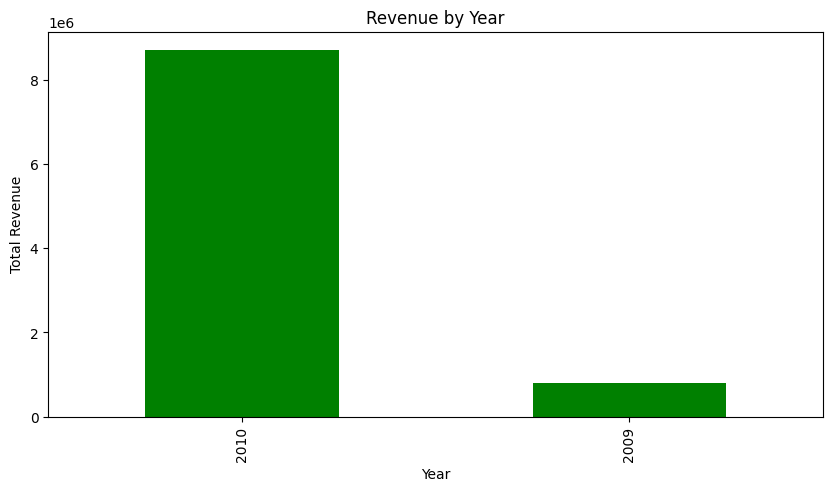

Monthly total quantity sold:
 Month
1     374510
2     367501
3     488012
4     350478
5     362771
6     386447
7     301176
8     450775
9     476808
10    599658
11    670570
12    584478
Name: Quantity, dtype: int64
Month with peak sales: 11 (Quantity: 670570)


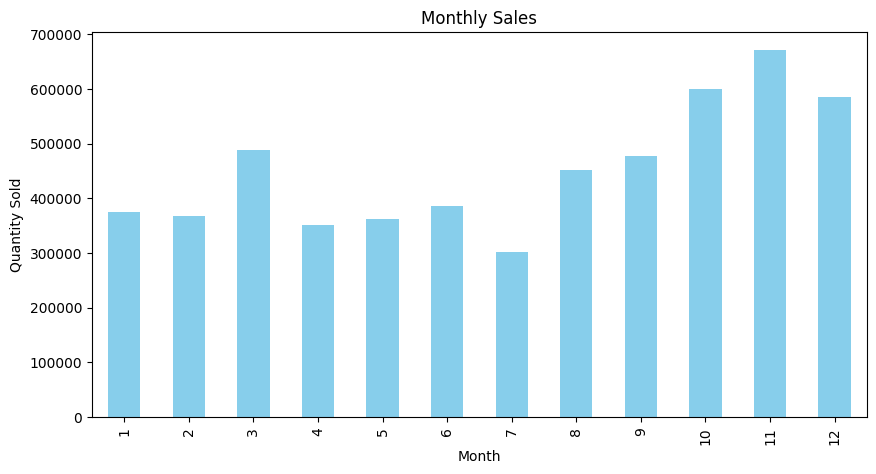

No 'Returned' column found; skipping monthly returns analysis.


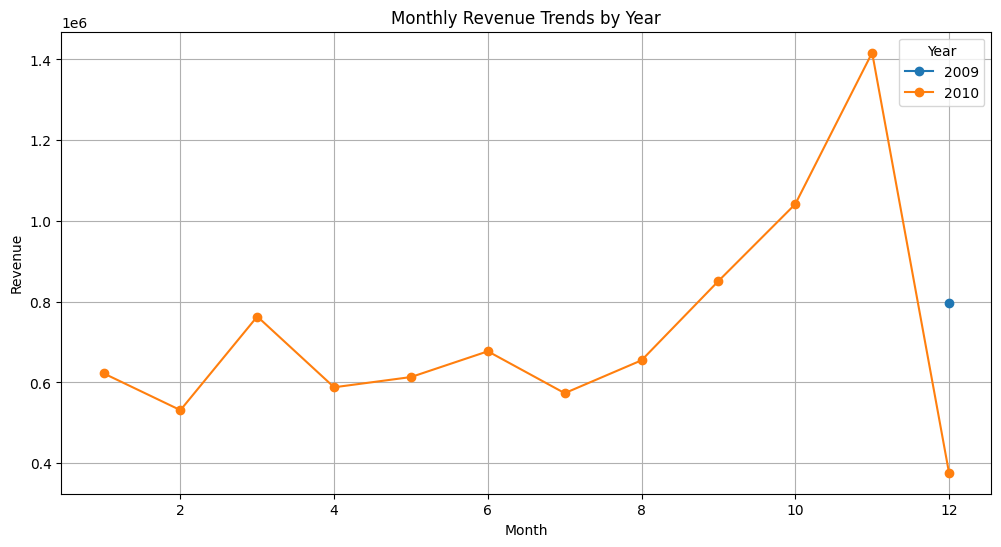

In [95]:

df['Year'] = df.index.year
df['Month'] = df.index.month

# Which year generated the highest revenue?
yearly_revenue = df.groupby('Year')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by year:\n", yearly_revenue)
print(f"Year with highest revenue: {yearly_revenue.idxmax()} (${yearly_revenue.max():,.2f})")

# Visualization
yearly_revenue.plot(kind='bar', figsize=(10,5), color='green', title='Revenue by Year')
plt.ylabel('Total Revenue')
plt.show()

#Which month shows peak sales and peak returns
monthly_sales = df.groupby('Month')['Quantity'].sum()
print("Monthly total quantity sold:\n", monthly_sales)
peak_sales_month = monthly_sales.idxmax()
print(f"Month with peak sales: {peak_sales_month} (Quantity: {monthly_sales.max()})")

# Visualization
monthly_sales.plot(kind='bar', figsize=(10,5), color='skyblue', title='Monthly Sales')
plt.ylabel('Quantity Sold')
plt.show()

if 'Returned' in df.columns:
    monthly_returns = df[df['Returned'] == True].groupby('Month')['Quantity'].sum()
    print("Monthly returns:\n", monthly_returns)
    peak_return_month = monthly_returns.idxmax()
    print(f"Month with peak returns: {peak_return_month} (Quantity: {monthly_returns.max()})")

    # Visualization
    monthly_returns.plot(kind='bar', figsize=(10,5), color='red', title='Monthly Returns')
    plt.ylabel('Quantity Returned')
    plt.show()
else:
    print("No 'Returned' column found; skipping monthly returns analysis.")

#  checking seasonality in sales or returns

monthly_trends = df.groupby(['Year','Month'])['Revenue'].sum().unstack(level=0)
monthly_trends.plot(figsize=(12,6), marker='o', title='Monthly Revenue Trends by Year')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

if 'Returned' in df.columns:
    monthly_return_trends = df[df['Returned'] == True].groupby(['Year','Month'])['Quantity'].sum().unstack(level=0)
    monthly_return_trends.plot(figsize=(12,6), marker='x', color='red', title='Monthly Return Trends by Year')
    plt.xlabel('Month')
    plt.ylabel('Quantity Returned')
    plt.grid(True)
    plt.show()

# returns more common in specific periods?
if 'Returned' in df.columns:
    avg_returns_per_month = df[df['Returned']==True].groupby('Month')['Quantity'].sum()
    print("Average returns per month:\n", avg_returns_per_month)

Top countries by total revenue:
 Country
United Kingdom    8161692.763
EIRE               352235.680
Netherlands        263861.760
Germany            195920.421
France             130661.550
Sweden              51190.110
Denmark             46972.950
Switzerland         43343.410
Spain               37052.130
Australia           30051.800
Name: Revenue, dtype: float64


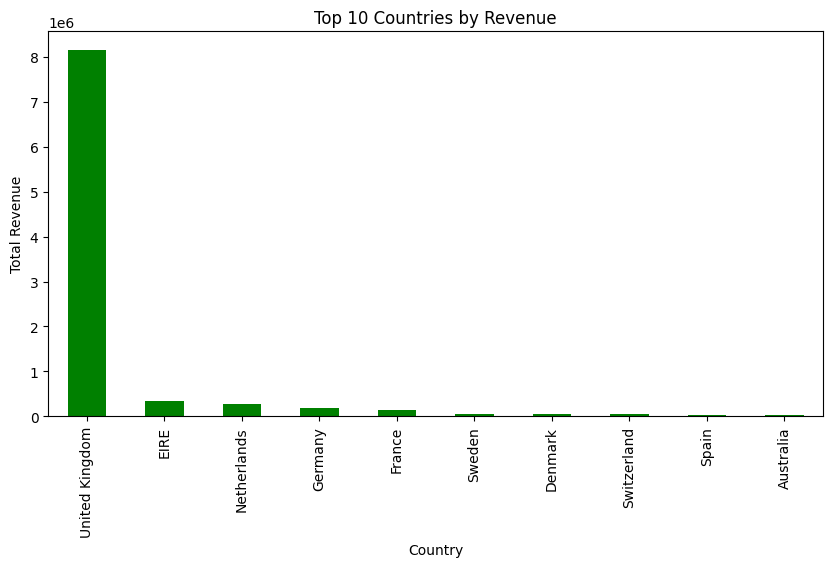

Top countries by number of transactions:
 Country
United Kingdom     479047
EIRE                 9660
Germany              8120
France               5754
Netherlands          2768
Spain                1271
Switzerland          1187
Portugal             1098
Belgium              1053
Channel Islands       906
dtype: int64


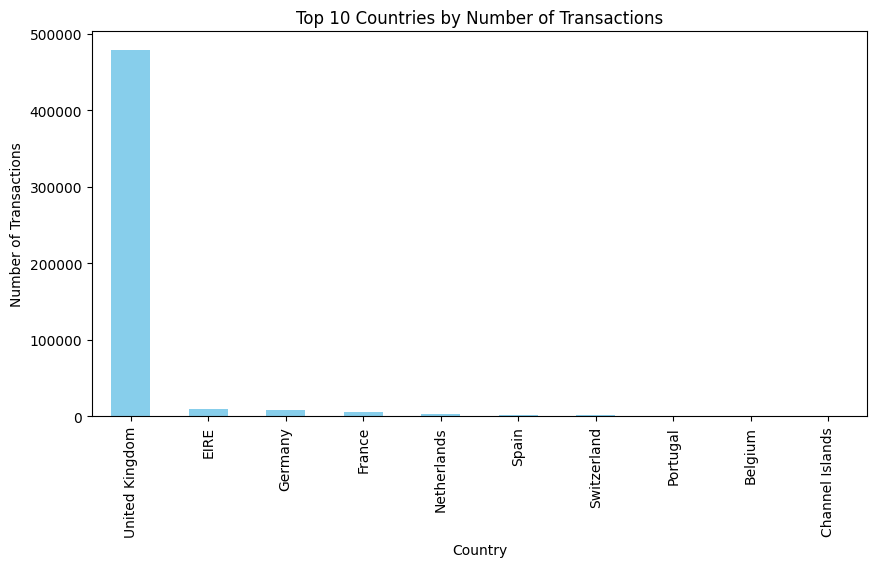

No 'Returned' column found; skipping return rate analysis.


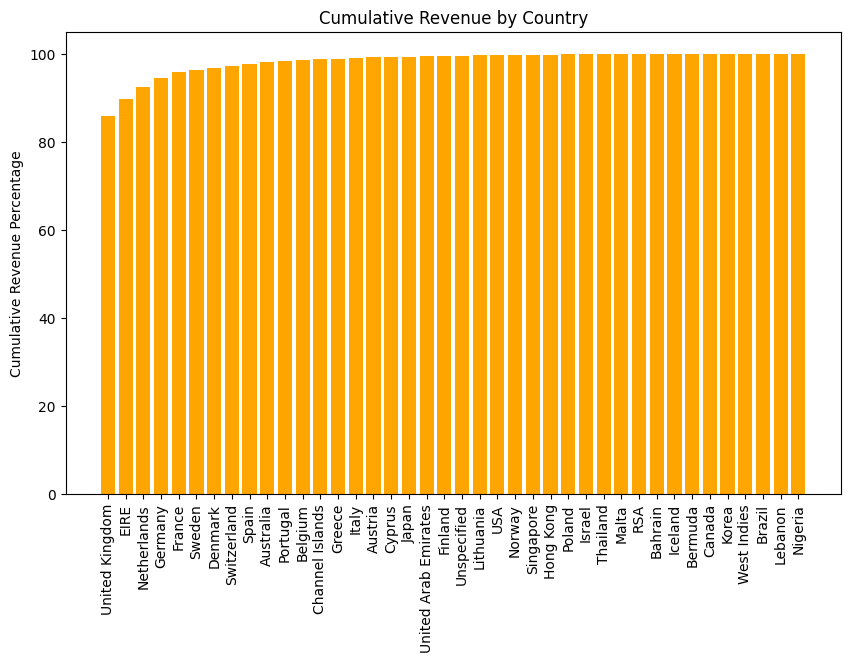

0 out of 40 countries (~0.00%) contribute to 80% of revenue.


In [96]:
# Which countries generate the most revenue?
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Top countries by total revenue:\n", country_revenue.head(10))

# Visualization
country_revenue.head(10).plot(kind='bar', figsize=(10,5), color='green', title='Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.show()

# countries have the highest number of transactions?
country_transactions = df.groupby('Country').size().sort_values(ascending=False)
print("Top countries by number of transactions:\n", country_transactions.head(10))

# Visualization
country_transactions.head(10).plot(kind='bar', figsize=(10,5), color='skyblue', title='Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.show()

# countries have the highest return rate
if 'Returned' in df.columns:
    country_returns = df.groupby('Country')['Returned'].mean().sort_values(ascending=False)  # mean gives % of returns
    print("Top countries by return rate:\n", country_returns.head(10) * 100)  # multiply by 100 to get %

    # Visualization
    country_returns.head(10).plot(kind='bar', figsize=(10,5), color='red', title='Top 10 Countries by Return Rate')
    plt.ylabel('Return Rate (%)')
    plt.show()
else:
    print("No 'Returned' column found; skipping return rate analysis.")

# revenue concentration country-specific
df_sorted = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
df_sorted['Cumulative_Revenue'] = df_sorted['Revenue'].cumsum()
df_sorted['Cumulative_Percent'] = df_sorted['Cumulative_Revenue'] / df_sorted['Revenue'].sum() * 100

plt.figure(figsize=(10,6))
plt.bar(df_sorted['Country'], df_sorted['Cumulative_Percent'], color='orange')
plt.xticks(rotation=90)
plt.title('Cumulative Revenue by Country')
plt.ylabel('Cumulative Revenue Percentage')
plt.show()

# How many countries contribute to 80% of total revenue
countries_80 = df_sorted[df_sorted['Cumulative_Percent'] <= 80].shape[0]
print(f"{countries_80} out of {len(df_sorted)} countries (~{countries_80/len(df_sorted)*100:.2f}%) contribute to 80% of revenue.")

In [97]:
# Revenue contribution by country (Pareto / 80-20 analysis)
country_rev = (
    df.groupby('Country')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

total_rev = country_rev['Revenue'].sum()

country_rev['rev_share'] = country_rev['Revenue'] / total_rev
country_rev['cum_share'] = country_rev['rev_share'].cumsum()

# Countries contributing to ~80% of revenue
top80 = country_rev[country_rev['cum_share'] <= 0.80]

# Include the country that crosses the 80% threshold
if len(top80) < len(country_rev):
    top80 = country_rev.iloc[:len(top80) + 1]

print(f"{len(top80)} out of {country_rev.shape[0]} countries contribute ~80% of revenue")

top80.head(15)


1 out of 40 countries contribute ~80% of revenue


,Country,Revenue,rev_share,cum_share
0,United Kingdom,8161692.763,0.858604,0.858604


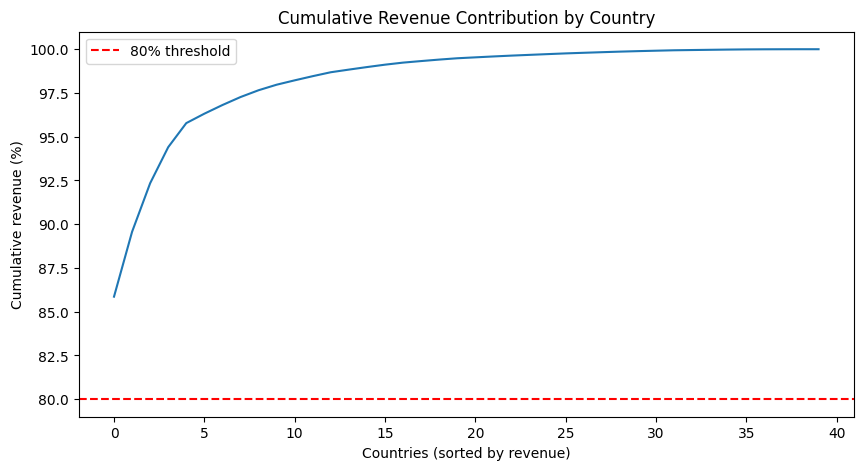

In [98]:
plt.figure(figsize=(10,5))
plt.plot(country_rev['cum_share'].values * 100)
plt.axhline(80, color='red', linestyle='--', label='80% threshold')
plt.xlabel('Countries (sorted by revenue)')
plt.ylabel('Cumulative revenue (%)')
plt.title('Cumulative Revenue Contribution by Country')
plt.legend()
plt.show()

Analysing customer

Top 10 customers by revenue:
 Customer ID
18102    341776.73
14646    243853.05
14156    183163.55
14911    137710.76
13694    128172.42
17511     83760.60
15061     82162.74
16684     75610.17
13089     55801.73
16754     54558.18
Name: Revenue, dtype: float64


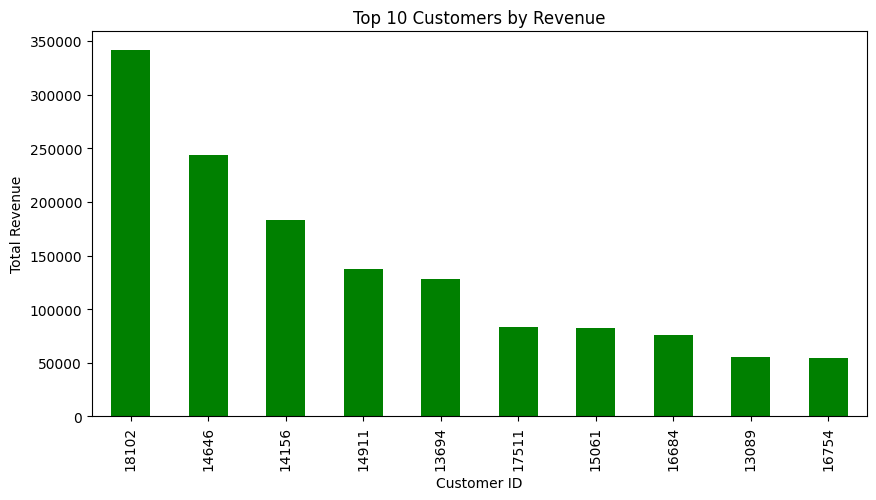

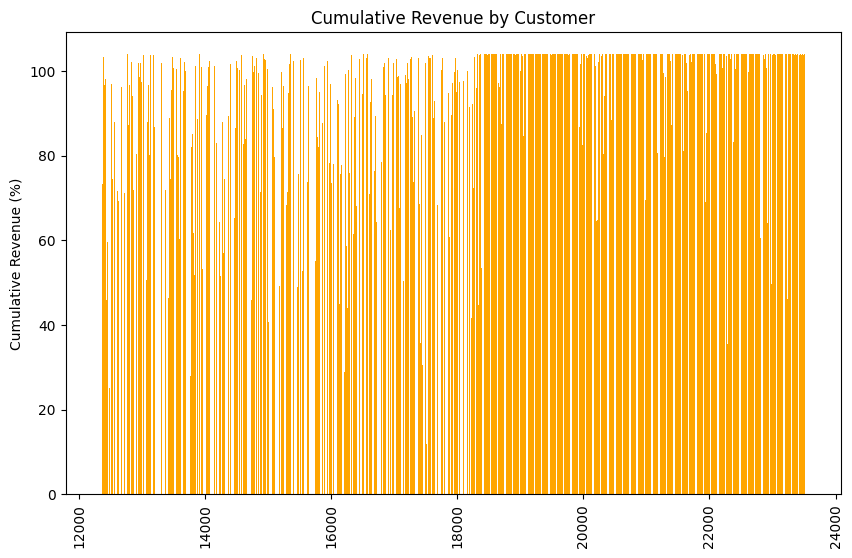

1333 out of 9618 customers (~13.86%) contribute to 80% of revenue.
Top 10 customers by returned products:
 Customer ID
23498   -1
12402   -1
23522   -1
23521   -1
12418   -1
23520   -1
12360   -1
23519   -1
12382   -1
23503   -1
Name: Quantity, dtype: int64


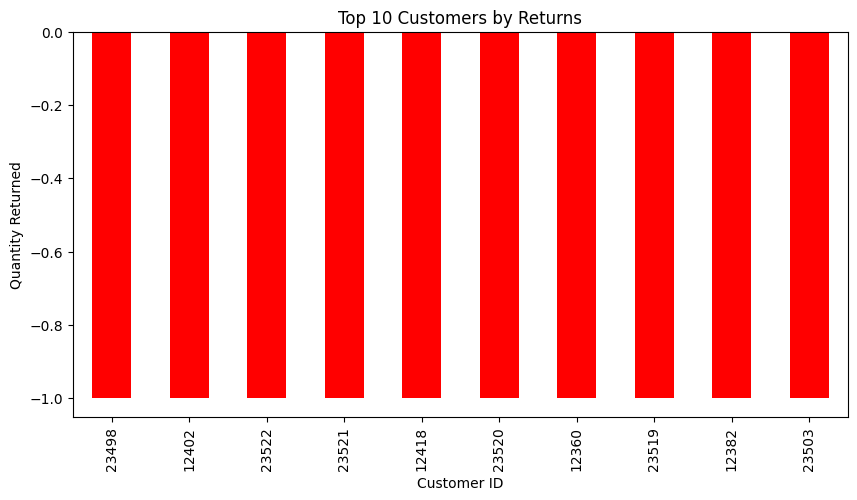

             Total_Purchased  Total_Returned  Return_Rate
Customer ID                                              
13112                     -1           -12.0       1200.0
15354                     -1            -4.0        400.0
14308                     -1            -3.0        300.0
15760                     -1            -3.0        300.0
15202                     -2            -5.0        250.0
14906                     -1            -2.0        200.0
14832                     -1            -2.0        200.0
12918                     -1            -2.0        200.0
14328                     -1            -2.0        200.0
13290                     -1            -2.0        200.0


In [99]:
# Top Customers
customer_revenue = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 customers by revenue:\n", customer_revenue.head(10))

# Visualization
customer_revenue.head(10).plot(kind='bar', figsize=(10,5), color='green', title='Top 10 Customers by Revenue')
plt.ylabel('Total Revenue')
plt.show()

# Do a small number of customers account for most revenue
df_sorted = customer_revenue.reset_index().sort_values('Revenue', ascending=False)
df_sorted['Cumulative_Revenue'] = df_sorted['Revenue'].cumsum()
df_sorted['Cumulative_Percent'] = df_sorted['Cumulative_Revenue'] / df_sorted['Revenue'].sum() * 100

plt.figure(figsize=(10,6))
plt.bar(df_sorted['Customer ID'], df_sorted['Cumulative_Percent'], color='orange')
plt.xticks(rotation=90)
plt.title('Cumulative Revenue by Customer')
plt.ylabel('Cumulative Revenue (%)')
plt.show()

customers_80 = df_sorted[df_sorted['Cumulative_Percent'] <= 80].shape[0]
print(f"{customers_80} out of {len(df_sorted)} customers (~{customers_80/len(df_sorted)*100:.2f}%) contribute to 80% of revenue.")

# customers return the most products
if 'IsReturn' in df.columns:
        customer_returns = df[df['IsReturn'] == True].groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False)
        print("Top 10 customers by returned products:\n", customer_returns.head(10))

        # Visualization
        customer_returns.head(10).plot(kind='bar', figsize=(10,5), color='red', title='Top 10 Customers by Returns')
        plt.ylabel('Quantity Returned')
        plt.show()
else:
        print("No 'Returned' column found; skipping returns analysis.")

#  frequent buyers also frequent returners
# Calculate total purchases per customer
customer_purchases = df.groupby('Customer ID')['Quantity'].sum()
if 'IsReturn' in df.columns:
        customer_summary = pd.DataFrame({
            'Total_Purchased': customer_purchases,
            'Total_Returned': df.groupby('Customer ID')['Quantity'].sum() * 0  # initialize
        })
        customer_summary['Total_Returned'] = df[df['IsReturn']==True].groupby('Customer ID')['Quantity'].sum()
        customer_summary['Return_Rate'] = customer_summary['Total_Returned'] / customer_summary['Total_Purchased'] * 100
        print(customer_summary.sort_values('Return_Rate', ascending=False).head(10))
else:
        print("Cannot analyze frequent buyers vs returners without 'Returned' column.")

Discoveringbulk orders do generate disproportionate revenue

Per Product

Number of bulk orders: 104373
Bulk purchases account for 20.13% of all transactions
Average revenue for bulk purchases: $55.00
Average revenue for normal purchases: $9.09
Return rate for bulk orders: 0.51%
Return rate for normal orders: 2.84%


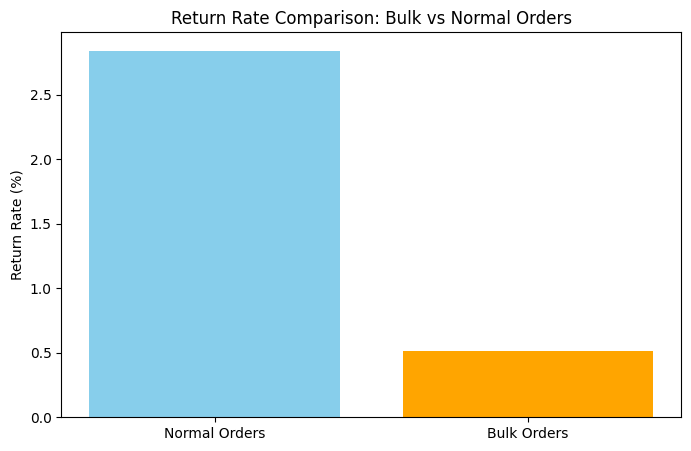

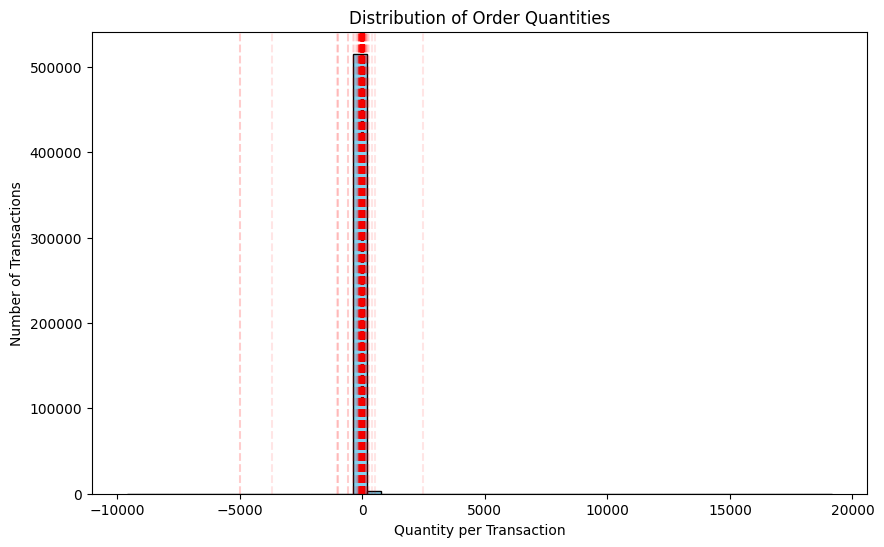

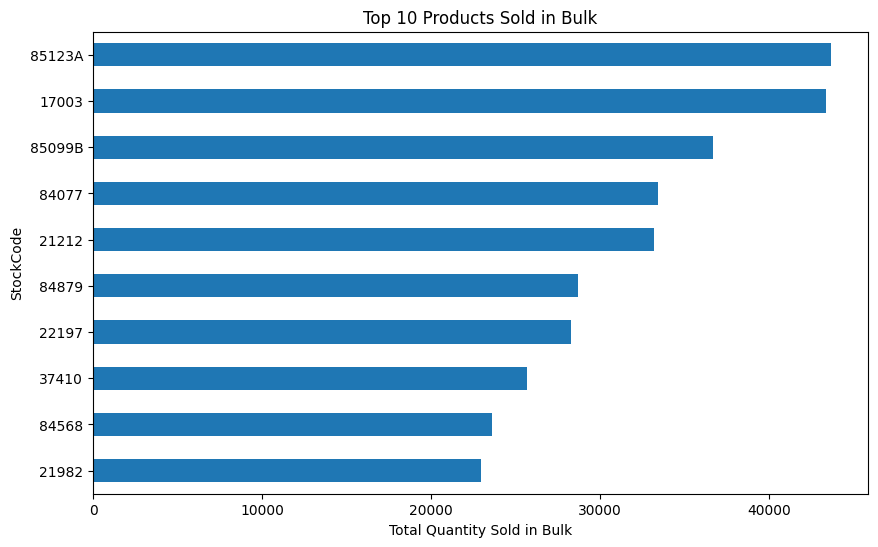

In [100]:

# 1Compute median quantity per product
product_medians = df.groupby('StockCode')['Quantity'].median().rename('MedianQuantity')

# Ensure InvoiceDate is a column before merging, as it might have been the index previously
# Check if 'InvoiceDate' is the current index name
if df.index.name == 'InvoiceDate':
    df = df.reset_index()

df = df.merge(product_medians, on='StockCode')

# Define bulk orders (quantity > 2 * product median)
df['IsBulk'] = df['Quantity'] > df['MedianQuantity'] * 2



# Bulk purchase statistics
total_transactions = len(df)
bulk_transactions = df[df['IsBulk']]
print(f"Number of bulk orders: {len(bulk_transactions)}")
bulk_percentage = (len(bulk_transactions) / total_transactions) * 100
print(f"Bulk purchases account for {bulk_percentage:.2f}% of all transactions")

# Revenue comparison
average_revenue_bulk = bulk_transactions['Revenue'].mean()
average_revenue_normal = df[~df['IsBulk']]['Revenue'].mean()
print(f"Average revenue for bulk purchases: ${average_revenue_bulk:,.2f}")
print(f"Average revenue for normal purchases: ${average_revenue_normal:,.2f}")

# Return analysis (if 'IsReturn' exists)
if 'IsReturn' in df.columns:
    # Total bulk vs normal orders
    total_bulk_orders = len(df[df['IsBulk']])
    total_normal_orders = len(df[~df['IsBulk']])

    # Returned bulk vs normal orders
    returned_bulk_orders = len(df[(df['IsBulk']) & (df['IsReturn'] == True)])
    returned_normal_orders = len(df[(~df['IsBulk']) & (df['IsReturn'] == True)])

    # Return rates
    bulk_return_rate = (returned_bulk_orders / total_bulk_orders) * 100
    normal_return_rate = (returned_normal_orders / total_normal_orders) * 100
    print(f"Return rate for bulk orders: {bulk_return_rate:.2f}%")
    print(f"Return rate for normal orders: {normal_return_rate:.2f}%")

    # Visualization: return rates
    plt.figure(figsize=(8,5))
    plt.bar(['Normal Orders', 'Bulk Orders'], [normal_return_rate, bulk_return_rate], color=['skyblue','orange'])
    plt.ylabel('Return Rate (%)')
    plt.title('Return Rate Comparison: Bulk vs Normal Orders')
    plt.show()
else:
    print("No 'IsReturn' column found; cannot analyze return rates.")

# Visualization: Quantity distribution with bulk threshold
plt.figure(figsize=(10,6))
plt.hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity per Transaction')
plt.ylabel('Number of Transactions')

# Plot median per product as vertical lines
for median in product_medians:
    plt.axvline(median, color='red', linestyle='dashed', alpha=0.1)
plt.show()


#the largest total quantity sold in bulk
top_bulk_quantity = (
    df[df['IsBulk']]
    .groupby('StockCode')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_bulk_quantity.sort_values().plot(kind='barh')
plt.xlabel('Total Quantity Sold in Bulk')
plt.title('Top 10 Products Sold in Bulk')
plt.show()

Bulk purchase not for specific product if the number of quantities was larger than media

Typical order size (median quantity per transaction): 3.0
Bulk purchases (> 6.0 units) account for 31.45% of all transactions
Average revenue for bulk purchases: $40.86
Average revenue for normal purchases: $8.00
Median quantity of returned orders: -2.0
0.00% of returned orders were bulk purchases


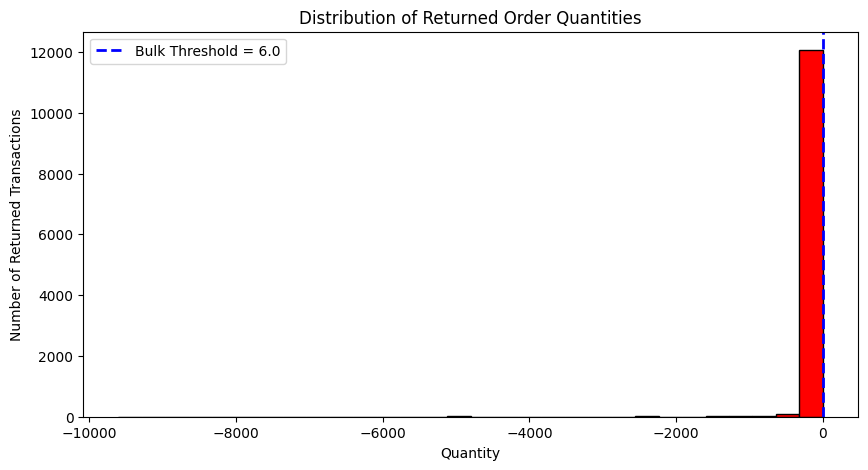

In [101]:
# Typical order size (median quantity)

median_quantity = df['Quantity'].median()
print(f"Typical order size (median quantity per transaction): {median_quantity}")


# Define bulk purchase as quantity greater than median * 2 (can adjust)
bulk_threshold = median_quantity * 2
bulk_purchases = df[df['Quantity'] > bulk_threshold]
bulk_percentage = (len(bulk_purchases) / len(df)) * 100
print(f"Bulk purchases (> {bulk_threshold} units) account for {bulk_percentage:.2f}% of all transactions")


# cheching Do bulk purchases significantly increase revenue
average_revenue_bulk = bulk_purchases['Revenue'].mean()
average_revenue_normal = df[df['Quantity'] <= bulk_threshold]['Revenue'].mean()
print(f"Average revenue for bulk purchases: ${average_revenue_bulk:,.2f}")
print(f"Average revenue for normal purchases: ${average_revenue_normal:,.2f}")

# Are returns associated with bulk purchases
if 'IsReturn' in df.columns:
    returned_orders = df[df['IsReturn'] == True]
    median_return_quantity = returned_orders['Quantity'].median()
    print(f"Median quantity of returned orders: {median_return_quantity}")

    # Compare bulk purchases in returns
    bulk_returns = returned_orders[returned_orders['Quantity'] > bulk_threshold]
    bulk_return_percentage = (len(bulk_returns) / len(returned_orders)) * 100
    print(f"{bulk_return_percentage:.2f}% of returned orders were bulk purchases")

    # Visualization: bulk vs normal returns
    plt.figure(figsize=(10,5))
    plt.hist(returned_orders['Quantity'], bins=30, color='red', edgecolor='black')
    plt.axvline(bulk_threshold, color='blue', linestyle='dashed', linewidth=2, label=f'Bulk Threshold = {bulk_threshold}')
    plt.title('Distribution of Returned Order Quantities')
    plt.xlabel('Quantity')
    plt.ylabel('Number of Returned Transactions')
    plt.legend()
    plt.show()
else:
    print("No 'Returned' column found; cannot analyze returns vs order size.")

Ayalysing the pricing


Unit price statistics:
 count    518596.000000
mean          4.716176
std         147.090460
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64
Typical price range (25th to 75th percentile): $1.25 - $4.21


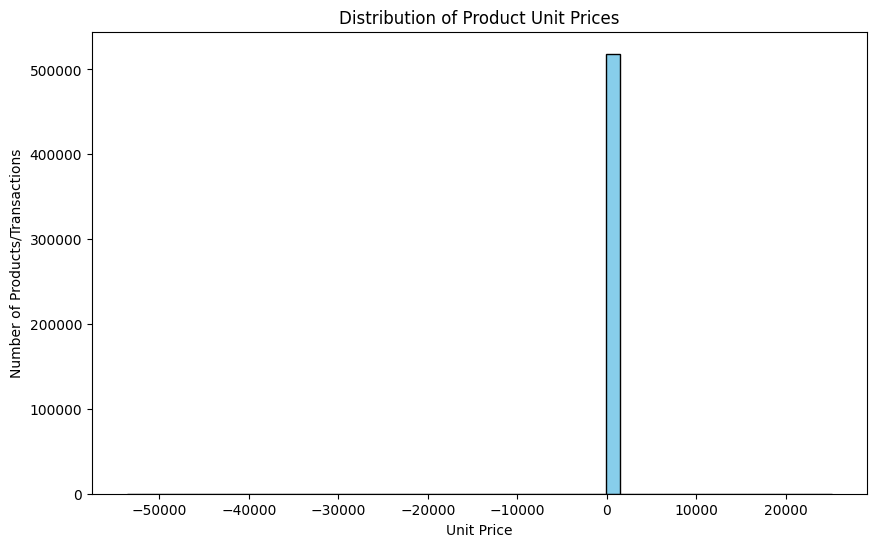

Revenue from top 10% high-priced products: $1,379,732.41 (14.51% of total revenue)
Number of transactions with zero or negative prices: 3684
Number of returned/cancelled transactions with zero/negative price: 2121


In [102]:
# Typical unit price range
price_stats = df['Price'].describe()
print("Unit price statistics:\n", price_stats)
print(f"Typical price range (25th to 75th percentile): ${price_stats['25%']:.2f} - ${price_stats['75%']:.2f}")

# Visualization: histogram of unit prices
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Number of Products/Transactions')
plt.show()

# Are high-priced products responsible for large revenue spikes?
# Define "high-priced" as top 10% of prices
high_price_threshold = df['Price'].quantile(0.90)
high_price_sales = df[df['Price'] > high_price_threshold]['Revenue'].sum()
total_revenue = df['Revenue'].sum()
high_price_pct = (high_price_sales / total_revenue) * 100
print(f"Revenue from top 10% high-priced products: ${high_price_sales:,.2f} ({high_price_pct:.2f}% of total revenue)")

# Are zero or negative prices associated with cancellations?
zero_negative_prices = df[df['Price'] <= 0]
zero_negative_count = len(zero_negative_prices)
print(f"Number of transactions with zero or negative prices: {zero_negative_count}")

if 'IsReturn' in df.columns:
    returned_zero_negative = zero_negative_prices[zero_negative_prices['IsReturn'] == True]
    print(f"Number of returned/cancelled transactions with zero/negative price: {len(returned_zero_negative)}")

## Preparing data for modeling

Visualize and Handle outliers

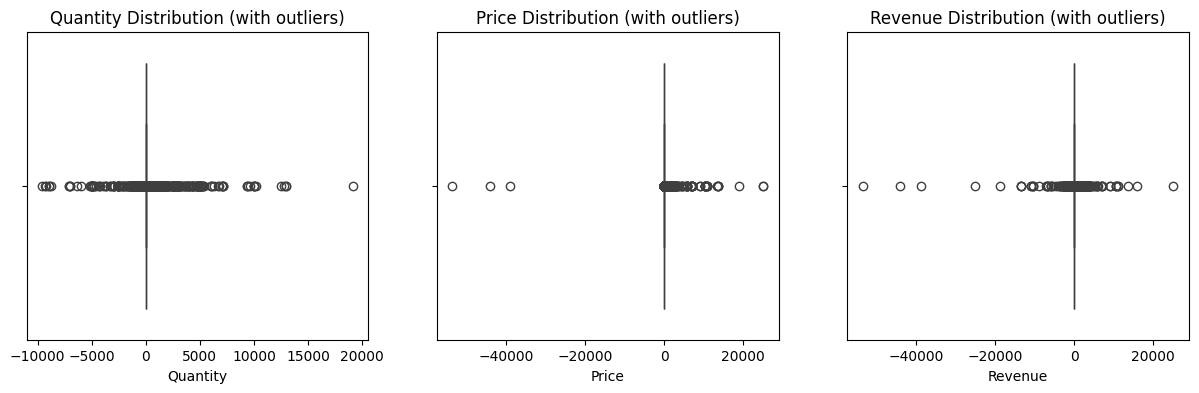

In [103]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Distribution (with outliers)')

plt.subplot(1,3,2)
sns.boxplot(x=df['Price'])
plt.title('Price Distribution (with outliers)')

plt.subplot(1,3,3)
sns.boxplot(x=df['Revenue'])
plt.title('Revenue Distribution (with outliers)')

plt.show()

In [104]:
# IQR method for Quantity
Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_qty = Q1_qty - 1.5*IQR_qty
upper_qty = Q3_qty + 1.5*IQR_qty

# IQR method for UnitPrice
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5*IQR_price
upper_price = Q3_price + 1.5*IQR_price

print(f"Quantity IQR: {IQR_qty}, Lower bound: {lower_qty}, Upper bound: {upper_qty}")
print(f"Price IQR: {IQR_price}, Lower bound: {lower_price}, Upper bound: {upper_price}")


Quantity IQR: 9.0, Lower bound: -12.5, Upper bound: 23.5
Price IQR: 2.96, Lower bound: -3.1899999999999995, Upper bound: 8.649999999999999


In [105]:
# Handling the Outliers using log-transformative method
# Use absolute values to avoid negative returns for log
df['Quantity_signed_log'] = np.sign(df['Quantity']) * np.log1p(np.abs(df['Quantity']))
df['UnitPrice_log'] = np.nan
price_mask = df['Price'] > 0
df.loc[price_mask, 'UnitPrice_log'] = np.log1p(df.loc[price_mask, 'Price'])

# Light cliping
low_p = df['UnitPrice_log'].quantile(0.01)
high_p = df['UnitPrice_log'].quantile(0.99)
df['UnitPrice_log'] = df['UnitPrice_log'].clip(low_p, high_p)


df['Revenue_log'] = np.sign(df['Revenue']) * np.log1p(np.abs(df['Revenue']))
low_r = df['Revenue_log'].quantile(0.01)
high_r = df['Revenue_log'].quantile(0.99)
df['Revenue_log'] = df['Revenue_log'].clip(low_r, high_r)


In [106]:
from sklearn.preprocessing import RobustScaler

num_features = [
    'Quantity_signed_log',
    'UnitPrice_log',
    'Revenue_log'
]

scaler = RobustScaler()
df[num_features] = scaler.fit_transform(df[num_features])


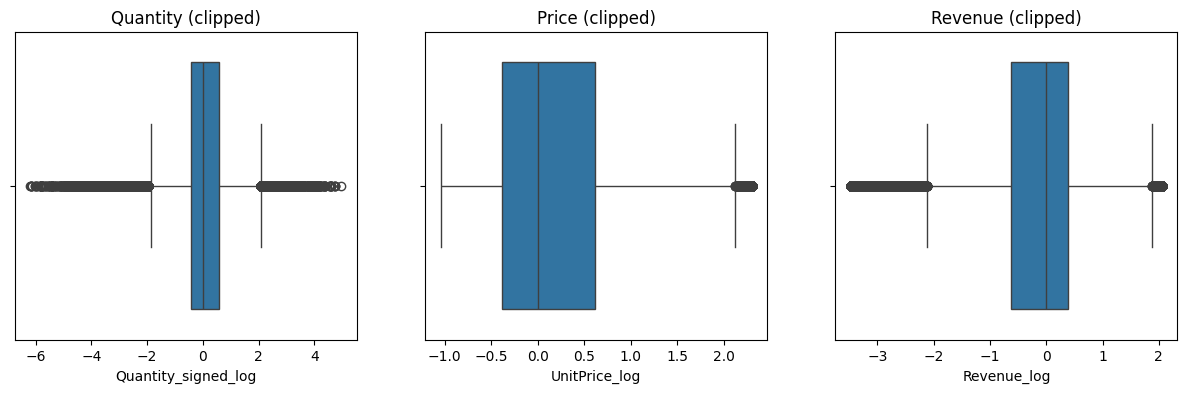

In [107]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x=df['Quantity_signed_log'])
plt.title('Quantity (clipped)')

plt.subplot(1,3,2)
sns.boxplot(x=df['UnitPrice_log'])
plt.title('Price (clipped)')

plt.subplot(1,3,3)
sns.boxplot(x=df['Revenue_log'])
plt.title('Revenue (clipped)')

plt.show()


Encode categorical features


In [108]:
#Encoding CustomerID using K-Fold Smoothed Target Encoding Target : Returened
from sklearn.model_selection import KFold

def kfold_target_encode(df, col, target, n_splits=5, smoothing=20):
    df = df.copy()
    global_mean = df[target].mean()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded = np.zeros(len(df))

    for train_idx, val_idx in kf.split(df):
        train, val = df.iloc[train_idx], df.iloc[val_idx]

        stats = train.groupby(col)[target].agg(['mean', 'count'])

        smooth = (
            (stats['count'] * stats['mean'] + smoothing * global_mean)
            / (stats['count'] + smoothing)
        )

        encoded[val_idx] = val[col].map(smooth)

    return pd.Series(encoded).fillna(global_mean)


df['CustomerID_E'] = kfold_target_encode(
    df,
    col='Customer ID',
    target='IsReturn'
)

In [109]:
#Encoding StocCode column using Frequency Encoding
stock_freq = df['StockCode'].value_counts()

df['StockCode_FE'] = df['StockCode'].map(stock_freq)



# Modeling


In [110]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import average_precision_score
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, f1_score, recall_score
)
from lightgbm import LGBMClassifier


df = df.rename(columns={"index": "InvoiceDate"}) # Reset the index to make 'InvoiceDate' a column again.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

In [111]:
print(df.columns)
print(type(df.index))

Index(['InvoiceDate', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'Price', 'Customer ID', 'Country', 'IsReturn', 'IsInvalidPrice',
       'IsCancelled', 'Revenue', 'Revenue_abs', 'Year', 'Month',
       'MedianQuantity', 'IsBulk', 'Quantity_signed_log', 'UnitPrice_log',
       'Revenue_log', 'CustomerID_E', 'StockCode_FE'],
      dtype='object')
<class 'pandas.core.indexes.range.RangeIndex'>


## Predict which customers are likely to stop buying
- A customer is churned if they did not purchase in the last N months

In [112]:
CHURN_DAYS = 180

snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

cust = df.groupby("Customer ID").agg(
    last_purchase=("InvoiceDate", "max"),
    first_purchase=("InvoiceDate", "min"),
    n_invoices=("Invoice", "nunique"),
    n_lines=("Invoice", "size"),
    total_qty=("Quantity", "sum"),
    total_revenue=("Revenue", "sum"),
    total_revenue_abs=("Revenue_abs", "sum"),
    returns_count=("IsReturn", "sum"),
    invalid_price_count=("IsInvalidPrice", "sum"),
    cancelled_count=("IsCancelled", "sum"),
)

cust["Recency"] = (snapshot_date - cust["last_purchase"]).dt.days
cust["TenureDays"] = (cust["last_purchase"] - cust["first_purchase"]).dt.days.clip(lower=0)

cust["AvgInvoiceValue_abs"] = cust["total_revenue_abs"] / cust["n_invoices"].clip(lower=1)
cust["LinesPerInvoice"] = cust["n_lines"] / cust["n_invoices"].clip(lower=1)

cust["ReturnRate_lines"] = cust["returns_count"] / cust["n_lines"].clip(lower=1)
cust["CancelRate_invoices"] = cust["cancelled_count"] / cust["n_invoices"].clip(lower=1)
cust["InvalidPriceRate_lines"] = cust["invalid_price_count"] / cust["n_lines"].clip(lower=1)

# Country (mode per customer)
cust_country = (
    df.groupby(["Customer ID", "Country"]).size()
      .reset_index(name="cnt")
      .sort_values(["Customer ID", "cnt"], ascending=[True, False])
      .drop_duplicates("Customer ID")
      .set_index("Customer ID")["Country"]
)
cust["Country"] = cust_country

cust["Churn"] = (cust["Recency"] > CHURN_DAYS).astype(int)

data = cust.reset_index(drop=True)
X = data.drop(columns=["Churn", "last_purchase", "first_purchase"])
y = data["Churn"]

print("Customers:", len(data), " | Churn rate:", round(y.mean(), 4))


Customers: 9618  | Churn rate: 0.4023


In [113]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = ["Country"] if "Country" in X.columns else []

preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ],
    remainder="drop"
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LGBMClassifier(
        objective="binary",
        random_state=42,
        n_estimators=500
    ))
])


In [114]:
param_dist = {
    "clf__n_estimators": [300, 500, 800, 1200],
    "clf__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "clf__num_leaves": [15, 31, 63, 127],
    "clf__max_depth": [-1, 3, 5, 7, 9],
    "clf__subsample": [0.6, 0.75, 0.9, 1.0],
    "clf__colsample_bytree": [0.6, 0.75, 0.9, 1.0],
    "clf__min_child_samples": [10, 20, 40, 80],
    "clf__reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "clf__reg_lambda": [0.0, 0.1, 0.5, 1.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring="average_precision",  # PR-AUC
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_churn_model = search.best_estimator_

print("\nBest CV score (PR-AUC):", round(search.best_score_, 4))
print("Best params:", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 3095, number of negative: 4599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2512
[LightGBM] [Info] Number of data points in the train set: 7694, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402262 -> initscore=-0.396051
[LightGBM] [Info] Start training from score -0.396051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [115]:
proba = best_churn_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, proba)
f1_scores = (2 * precision * recall) / (precision + recall + 1e-12)

best_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds[max(best_idx - 1, 0)]  # thresholds length is len(precision)-1

pred_f1 = (proba >= best_threshold_f1).astype(int)

print("\n=== Threshold tuned for F1 ===")
print("Best threshold:", round(float(best_threshold_f1), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))
print("PR-AUC:", round(average_precision_score(y_test, proba), 4))
print(confusion_matrix(y_test, pred_f1))
print(classification_report(y_test, pred_f1, digits=4))



=== Threshold tuned for F1 ===
Best threshold: 0.6259
ROC-AUC: 1.0
PR-AUC: 1.0
[[1147    3]
 [   2  772]]
              precision    recall  f1-score   support

           0     0.9983    0.9974    0.9978      1150
           1     0.9961    0.9974    0.9968       774

    accuracy                         0.9974      1924
   macro avg     0.9972    0.9974    0.9973      1924
weighted avg     0.9974    0.9974    0.9974      1924



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [116]:
def get_feature_names(preprocessor):
    feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if name == "num":
            feature_names.extend(cols)
        elif name == "cat":
            oh = transformer.named_steps["oh"]
            cats = oh.get_feature_names_out(cols)
            feature_names.extend(cats.tolist())
    return feature_names

prep = best_churn_model.named_steps["prep"]
clf = best_churn_model.named_steps["clf"]
feature_names = get_feature_names(prep)

importances = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nTop 20 churn drivers:")
print(importances.head(20))



Top 20 churn drivers:
total_qty                 527
total_revenue             486
Recency                   438
AvgInvoiceValue_abs       338
n_lines                   335
total_revenue_abs         321
TenureDays                290
LinesPerInvoice           221
ReturnRate_lines           77
n_invoices                 65
CancelRate_invoices        57
returns_count              20
invalid_price_count         6
cancelled_count             4
InvalidPriceRate_lines      2
Country_Australia           0
Country_Austria             0
Country_Bahrain             0
Country_Belgium             0
Country_Bermuda             0
dtype: int32


## CUSTOMER LIFETIME VALUE (CLV)

## REVENUE FORECASTING — TimeSeriesSplit CV + RandomizedSearch + Feature importance


* Build monthly dataset with stronger features

In [117]:
monthly = (
    df.set_index("InvoiceDate")["Revenue"]
      .resample("ME")
      .sum()
      .reset_index()
      .rename(columns={"InvoiceDate":"Month","Revenue":"Revenue"})
)

monthly["Month_num"] = monthly["Month"].dt.month
monthly["Year"] = monthly["Month"].dt.year
monthly["month_sin"] = np.sin(2*np.pi*monthly["Month_num"]/12)
monthly["month_cos"] = np.cos(2*np.pi*monthly["Month_num"]/12)

for lag in [1, 2, 3]:
    monthly[f"lag_{lag}"] = monthly["Revenue"].shift(lag)

monthly["roll_mean_3"] = monthly["Revenue"].rolling(3).mean()

monthly_model = monthly.dropna().reset_index(drop=True)
Xr = monthly_model.drop(columns=["Month","Revenue"])
yr = monthly_model["Revenue"]

print("Monthly usable rows:", len(monthly_model))


Monthly usable rows: 10


* TimeSeriesSplit CV + RandomizedSearchCV

In [118]:
tscv = TimeSeriesSplit(n_splits=5)

reg = LGBMRegressor(random_state=42)

param_dist_reg = {
    "n_estimators": [300, 600, 900, 1500],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "num_leaves": [15, 31, 63, 127],
    "max_depth": [-1, 3, 5, 7, 9],
    "subsample": [0.6, 0.75, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.75, 0.9, 1.0],
    "min_child_samples": [5, 10, 20, 40],
    "reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "reg_lambda": [0.0, 0.1, 0.5, 1.0],
}

search_reg = RandomizedSearchCV(
    reg,
    param_distributions=param_dist_reg,
    n_iter=40,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_reg.fit(Xr, yr)
best_rev_model = search_reg.best_estimator_

print("\nBest CV MAE:", round(-search_reg.best_score_, 2))
print("Best params:", search_reg.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 10, number of used features: 0
[LightGBM] [Info] Start training from score 755538.225000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] S

* holdout evaluation (last 20%)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

train_size = int(len(monthly_model) * 0.8)
X_train, X_test = Xr.iloc[:train_size], Xr.iloc[train_size:]
y_train, y_test = yr.iloc[:train_size], yr.iloc[train_size:]

best_rev_model.fit(X_train, y_train)
pred = best_rev_model.predict(X_test)

baseline_pred = X_test["lag_1"]  # naive baseline
baseline_mae = mean_absolute_error(y_test, baseline_pred)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("\n=== Revenue Forecast Holdout ===")
print("Baseline MAE (lag_1):", round(baseline_mae, 2))
print("Model MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))
print("Improvement vs baseline (%):", round((baseline_mae - mae)/baseline_mae*100, 2))

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 8, number of used features: 0
[LightGBM] [Info] Start training from score 720302.273438
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

* Feature importance + interpretation (revenue)

In [120]:
imp_rev = pd.Series(best_rev_model.feature_importances_, index=Xr.columns).sort_values(ascending=False)
print("\nTop 15 revenue drivers:")
print(imp_rev.head(15))

# show actual vs predicted table
results = monthly_model.iloc[train_size:].copy()
results["Predicted"] = pred
results["Baseline_lag1"] = baseline_pred.values
print("\nActual vs Predicted (first 12 holdout months):")
print(results[["Month", "Revenue", "Baseline_lag1", "Predicted"]].head(12))



Top 15 revenue drivers:
Month_num      0
Year           0
month_sin      0
month_cos      0
lag_1          0
lag_2          0
lag_3          0
roll_mean_3    0
dtype: int32

Actual vs Predicted (first 12 holdout months):
       Month      Revenue  Baseline_lag1      Predicted
8 2010-11-30  1416697.202    1041685.610  720302.273438
9 2010-12-31   376266.820    1416697.202  720302.273438
